## MID-TEST ARTIFICAL INTELLIGENCE ##
#### FREDRIK (212100205) (33.33%) #### 
#### MALEAKHI EZEKIEL (212001298) (33.33%) #### 
#### JUSTIN HABEL KISWANTO (212100103) (33.33%) #### 

### Komitmen Integritas ###
“Di hadapan TUHAN yang hidup, saya menegaskan bahwa saya tidak memberikan maupun
menerima bantuan apapun—baik lisan, tulisan, maupun elektronik—di dalam ujian ini selain
daripada apa yang telah diizinkan oleh pengajar, dan tidak akan menyebarkan baik soal
maupun jawaban ujian kepada pihak lain.”


### Prediksi Harga Mobil Bekas ###

Membuat prediksi harga mobil bekas dengan regresi linear dari data yang ada.

Link data: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho

Link Github: https://github.com/Maleakhi01/UTS_AI

### Langkah Pertama ###
Mengimport semua library yang dibutuhkan.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [2]:
data = pd.read_csv("Car details v3.csv")
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


### Langkah Kedua ###

Mebaca data yang ada dengan pandas, namun ada data yang kotor, sehingga untuk memudahkan kami menghilangkan satuan pada beberapa column untuk membersihkan data. Ada juga data yang None, sehingga data ini harus dihapus karena tidak berguna untuk melatih machine learning ini.

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,seats,engine,max_power
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,5.0,1248.0,74.00
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,5.0,1498.0,103.52
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,5.0,1497.0,78.00
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,5.0,1396.0,90.00
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,5.0,1298.0,88.20
...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,5.0,1197.0,82.85
8124,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,5.0,1493.0,110.00
8125,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,5.0,1248.0,73.90
8126,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,5.0,1396.0,70.00


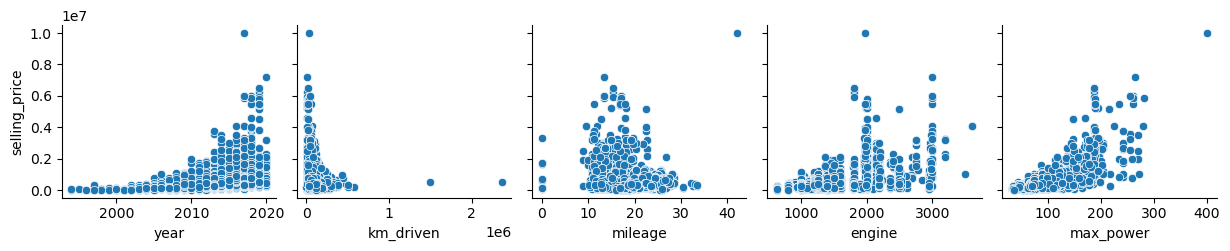

In [12]:
data = pd.read_csv("Car details v3.csv")
data = data.dropna()
mileage = data["mileage"]
mileage = mileage.str.replace("kmpl", "")
mileage = mileage.str.replace("km/kg", "").astype(float)
engine = data["engine"]
engine = engine.str.replace("CC", "").astype(float)
max_power = data["max_power"]
max_power = max_power.str.replace("bhp", " ")
data = data.drop(['name', 'torque', "engine", "max_power"], axis=1)

data["mileage"] = mileage
data["engine"] = engine
data["max_power"] = max_power.astype(float)
pd.set_option('display.max_columns', None)



# memplotkan scatter plot dari setiap pasangan variabel independen dan dependen
sns.pairplot(data, y_vars=['selling_price'], x_vars=['year', 'km_driven', 'mileage', 'engine', 'max_power'])
display(data)
plt.show()

Dalam kasus dataset mobil ini, variabel 'year' memiliki korelasi positif yang kuat dengan variabel dependen 'selling_price', yang berarti bahwa semakin baru tahun pembuatan mobil, semakin tinggi harga jualnya. Ini masuk akal, karena mobil yang lebih baru biasanya memiliki teknologi yang lebih baik, kualitas yang lebih baik, dan harga jual yang lebih tinggi.

Di sisi lain, variabel 'km_driven' memiliki korelasi negatif yang moderat dengan variabel dependen 'selling_price'. Ini menunjukkan bahwa semakin jauh jarak tempuh mobil, semakin rendah harga jualnya. 

Selain itu, semakin rendah nilai konsumsi bahan bakar (mileage), ukuran mesin (engine), dan tenaga maksimum (max_power), semakin rendah juga harga jual mobil tersebut.

### Langkah Ketiga ###
Melakukan One Hot Encoding untuk mengubah data kategorial menjadi vektor biner sehingga lebih mudah untuk diproses oleh komputer

In [4]:
data = pd.get_dummies(data)
data

,year,selling_price,km_driven,mileage,seats,engine,max_power,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,450000,145500,23.40,5.0,1248.0,74.00,0,1,0,0,0,1,0,0,1,1,0,0,0,0
1,2014,370000,120000,21.14,5.0,1498.0,103.52,0,1,0,0,0,1,0,0,1,0,0,1,0,0
2,2006,158000,140000,17.70,5.0,1497.0,78.00,0,0,0,1,0,1,0,0,1,0,0,0,0,1
3,2010,225000,127000,23.00,5.0,1396.0,90.00,0,1,0,0,0,1,0,0,1,1,0,0,0,0
4,2007,130000,120000,16.10,5.0,1298.0,88.20,0,0,0,1,0,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,18.50,5.0,1197.0,82.85,0,0,0,1,0,1,0,0,1,1,0,0,0,0
8124,2007,135000,119000,16.80,5.0,1493.0,110.00,0,1,0,0,0,1,0,0,1,0,1,0,0,0
8125,2009,382000,120000,19.30,5.0,1248.0,73.90,0,1,0,0,0,1,0,0,1,1,0,0,0,0
8126,2013,290000,25000,23.57,5.0,1396.0,70.00,0,1,0,0,0,1,0,0,1,1,0,0,0,0


### Langkah Keempat ###
Membagi data set menjadi 80% data latih dan 20% data uji

In [5]:
y = data[["selling_price"]]
X = data.drop(["selling_price"], axis = 1)



# pecah dataset ke dalam dua kelompok secara acak
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.80, random_state=1)
# random state dipilih = 1, untuk memberikan suatu realisasi keacakan, namun keacakan tersebut bernilai tetap untuk setiap keberjalanan algoritma


display(X_train)
display(y_train)


display(X_test)
display(y_test)

,year,km_driven,mileage,seats,engine,max_power,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
3244,2017,28050,28.09,5.0,1248.0,88.50,0,1,0,0,1,0,0,0,1,1,0,0,0,0
4069,2016,120000,23.90,5.0,1582.0,126.32,0,1,0,0,0,1,0,0,1,1,0,0,0,0
3396,2015,50000,20.51,5.0,998.0,67.04,0,0,0,1,0,1,0,0,1,0,0,0,0,1
5721,2009,60000,15.30,5.0,1596.0,101.00,0,0,0,1,0,1,0,0,1,0,0,0,0,1
705,2015,17000,21.10,5.0,814.0,55.20,0,0,0,1,0,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,2012,110000,25.44,5.0,936.0,57.60,0,1,0,0,0,1,0,0,1,1,0,0,0,0
5339,2013,50000,15.96,7.0,2523.0,62.10,0,1,0,0,0,1,0,0,1,1,0,0,0,0
4103,2010,70000,18.60,5.0,1199.0,79.40,0,0,0,1,0,1,0,0,1,1,0,0,0,0
244,2013,70000,12.99,7.0,2494.0,100.57,0,1,0,0,0,1,0,0,1,1,0,0,0,0


,selling_price
3244,800000
4069,850000
3396,300000
5721,210000
705,290000
...,...
933,150000
5339,500000
4103,150000
244,700000


,year,km_driven,mileage,seats,engine,max_power,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
338,2011,90000,19.30,5.0,1248.0,73.90,0,1,0,0,0,1,0,0,1,0,1,0,0,0
4632,2014,70000,23.40,5.0,1248.0,74.00,0,1,0,0,0,1,0,0,1,1,0,0,0,0
7973,2015,170000,12.99,7.0,2494.0,100.60,0,1,0,0,0,1,0,0,1,1,0,0,0,0
5214,2012,35000,19.00,5.0,998.0,67.10,0,0,0,1,0,1,0,0,1,0,0,1,0,0
2457,2011,49563,16.20,5.0,995.0,62.10,0,0,0,1,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7360,2017,58559,25.20,5.0,1248.0,74.00,0,1,0,0,1,0,0,0,1,1,0,0,0,0
7156,2018,20000,20.51,5.0,998.0,67.04,0,0,0,1,0,1,0,0,1,1,0,0,0,0
26,2017,28000,24.70,5.0,796.0,47.30,0,0,0,1,0,1,0,0,1,1,0,0,0,0
819,2016,70000,25.80,5.0,1498.0,98.60,0,1,0,0,0,1,0,0,1,0,0,1,0,0


,selling_price
338,265000
4632,450000
7973,1400000
5214,195000
2457,160000
...,...
7360,693000
7156,440000
26,275000
819,500000


### Langkah Kelima ###
Membangun model Regresi Linear

In [6]:
lr = LinearRegression()
lr.fit(X_train, y_train)

theta0 = lr.intercept_
[theta_lainnya] = lr.coef_
theta = np.append(theta0, theta_lainnya)
print(theta)

[-6.67503318e+07  3.31562547e+04 -9.69693926e-01  1.38873118e+04
 -4.26524879e+04  1.12342746e+02  1.27566931e+04  5.83636604e+03
 -5.56177884e+04  1.47021650e+05 -9.72402275e+04  2.02213189e+05
 -4.07435746e+04 -1.61469615e+05  2.38518473e+05 -2.38518473e+05
 -4.07799019e+05 -4.03820571e+05 -4.47560877e+05  1.68273695e+06
 -4.23556478e+05]


In [7]:
lr.score(X_train, y_train)

0.6888834958058974

Dapat dilihat skor yang didapatkan adalah sebesar 68,9%. Model yang dihasilkan ini **cukup baik** untuk mewakili data latih.

In [8]:
[[hasil_prediksi]] = lr.predict(X_test[0:1])
hasil_prediksi

238609.48791490495

In [9]:
from sklearn.metrics import mean_absolute_error
y_pred = lr.predict(X_test)
mean_absolute_error(y_pred, y_test)

256522.69181117736

In [10]:
[[hasil_prediksi]] = lr.predict([[2011,80000,20,5.0,1248.0,74.0,0,1,0,0,0,1,0,0,1,0,1,0,0,0]])
print("Hasil Prediksi :", hasil_prediksi)
X_test.head(1)

Hasil Prediksi : 259303.21478192508


/Users/maleakhiezekiel/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,year,km_driven,mileage,seats,engine,max_power,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
338,2011,90000,19.3,5.0,1248.0,73.9,0,1,0,0,0,1,0,0,1,0,1,0,0,0


In [11]:
y_test.head(1)

,selling_price
338,265000
